# Erstellung von Spaltenprofilen und deren Visualisierung. 
Das Notebook erstellt Spaltenprofile und erstellt visualisierungen der Ergebnisse. Spaltenprofile enthalten Daten zur statistischen Verteilung von Werten in den jeweiligen Spalten.

In [23]:
from soda.scan import Scan
import pandas as pd
from matplotlib import pyplot as plt

## Erstellen der Spaltenprofile

In [24]:
scan = Scan()
scan.set_data_source_name("demo_datasource")


scan.add_configuration_yaml_file(file_path="configuration.yml")

##################
scan.add_sodacl_yaml_file("profile.yml")

# scan.set_verbose(True)

scan.execute()


# Grab the results and load it into a pandas df
##################
results = scan.get_scan_results()
results_df = pd.json_normalize(results)
results_df

[13:46:06] scan.set_scan_definition_name(...) is not set and it is required to make the Soda Cloud integration work.  For this scan, Soda Cloud will be disabled.
[13:46:08] No valid checks found, 0 checks evaluated.
[13:46:08] scan.set_scan_definition_name(...) is not set and it is required to make the Soda Cloud integration work.  For this scan, Soda Cloud will be disabled.


,definitionName,defaultDataSource,dataTimestamp,scanStartTimestamp,scanEndTimestamp,hasErrors,hasWarnings,hasFailures,metrics,checks,queries,automatedMonitoringChecks,profiling,metadata,logs
0,None,demo_datasource,2024-08-08T11:46:06+00:00,2024-08-08T11:46:06+00:00,2024-08-08T11:46:08+00:00,True,False,False,[],[],[{'name': 'demo_datasource.discover-tables-fin...,[],"[{'table': 'bus_breakdown_and_delays', 'dataSo...","[{'table': 'bus_breakdown_and_delays', 'dataSo...","[{'level': 'INFO', 'message': 'Soda Core 3.3.5..."


In [25]:
# Extract profiling data
##################
profiling_df = pd.DataFrame(list(results_df.profiling)[0]) 
profiling_df

,table,dataSource,rowCount,columnProfiles
0,bus_breakdown_and_delays,demo_datasource,199998,"[{'columnName': 'school_year', 'profile': {'mi..."


## Generierung von Spaltendiagrammen basierend auf den Ergebnissen

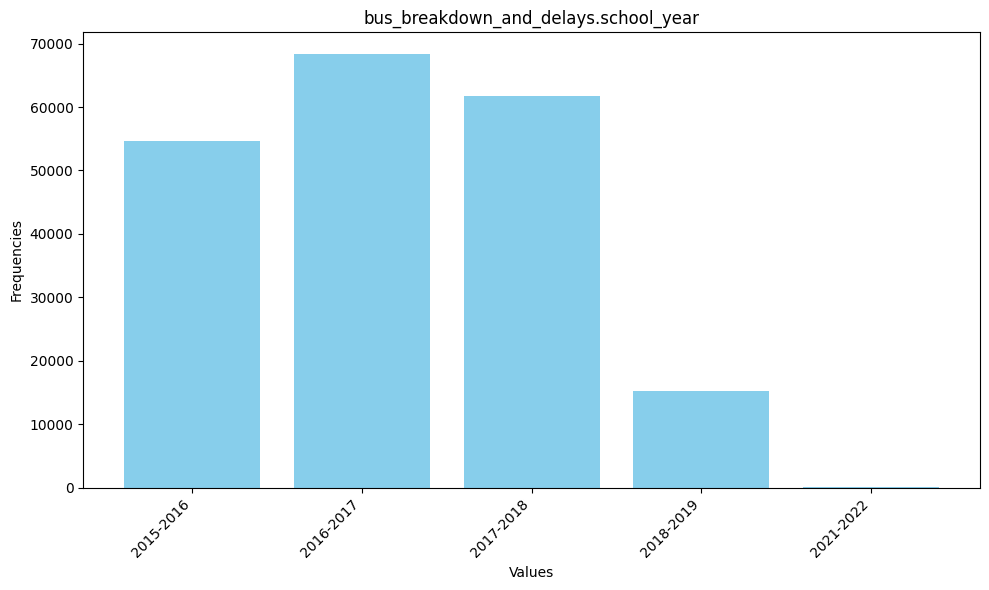

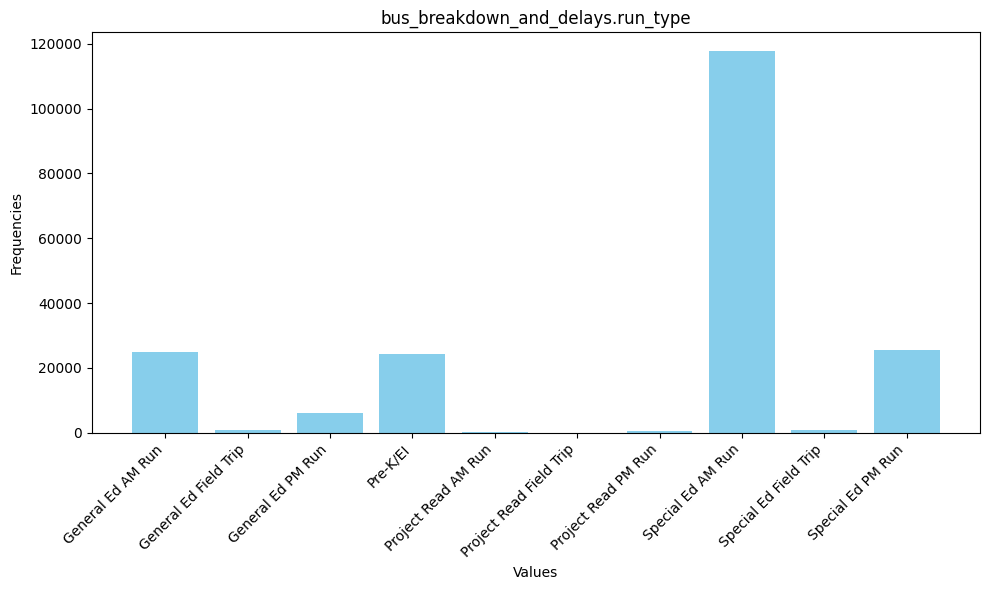

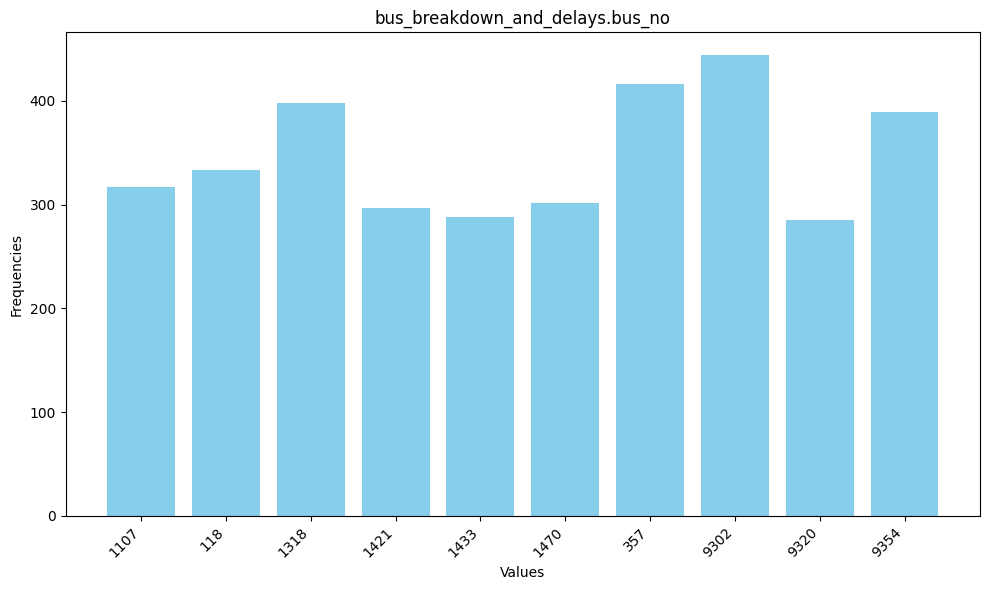

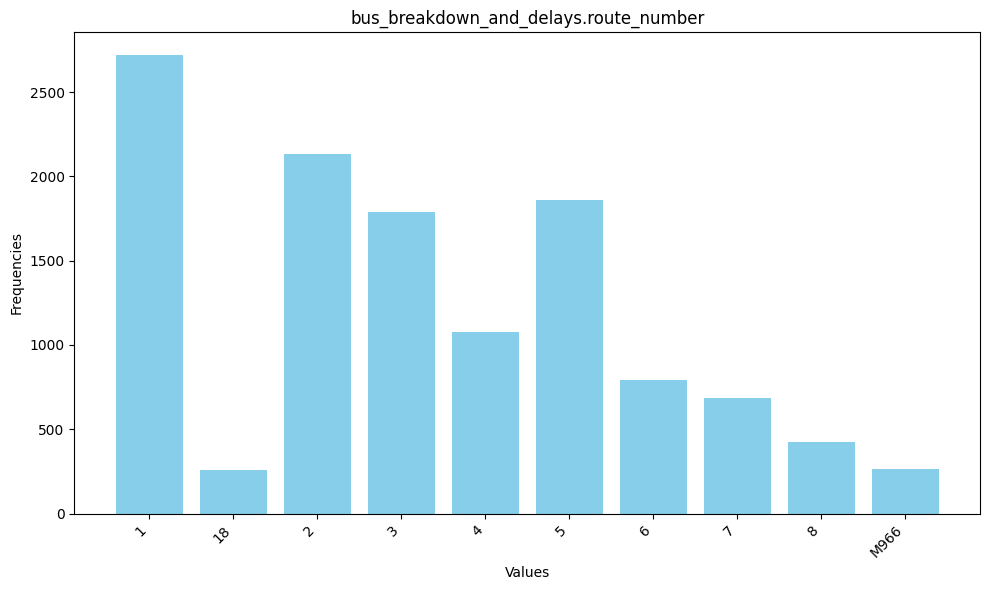

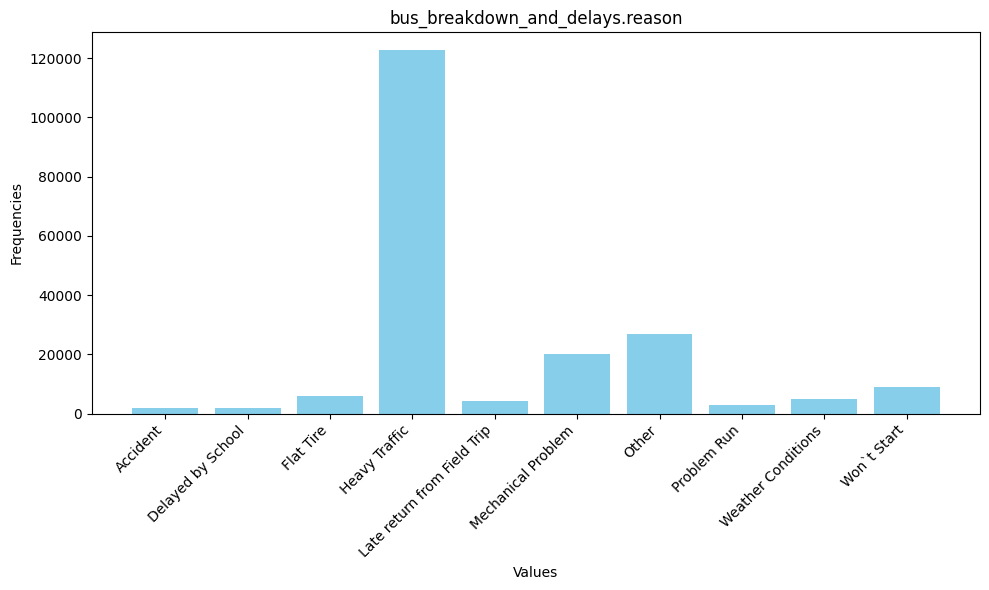

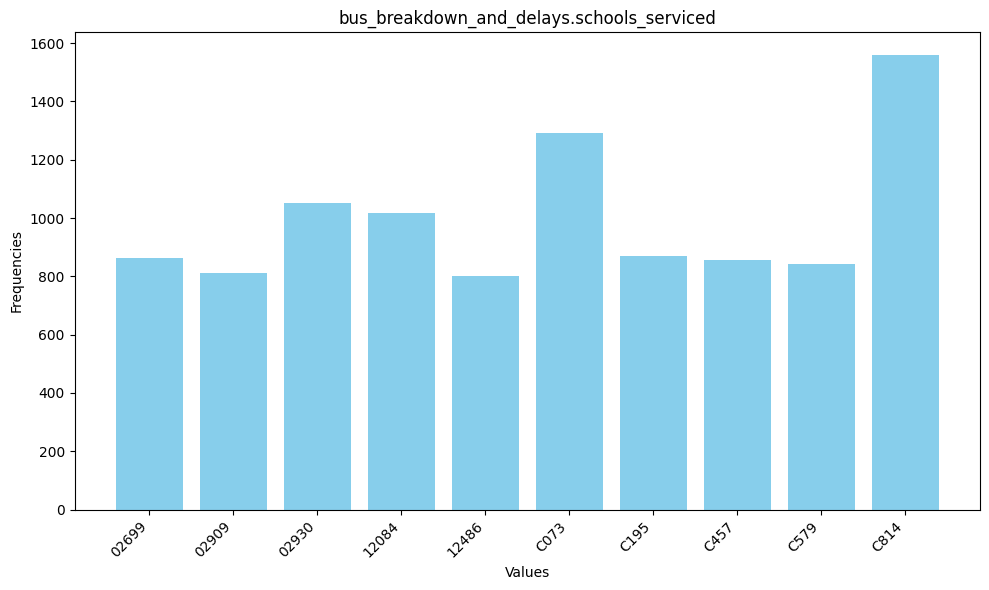

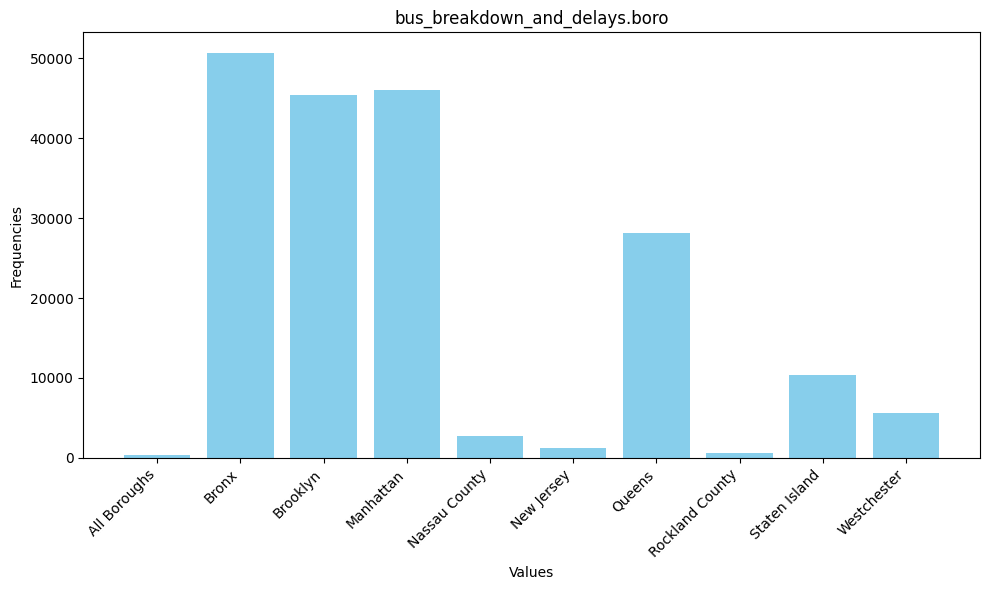

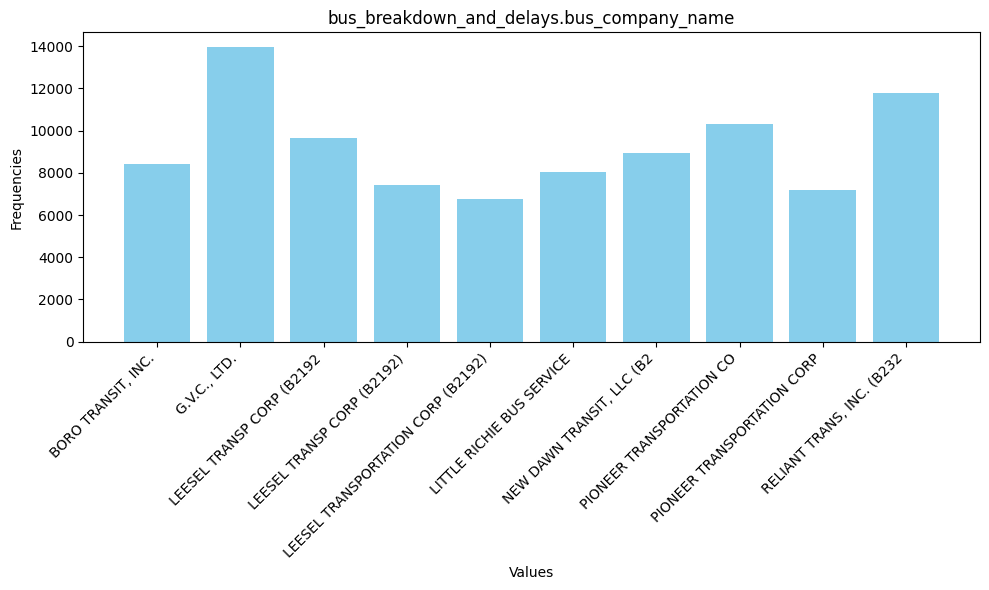

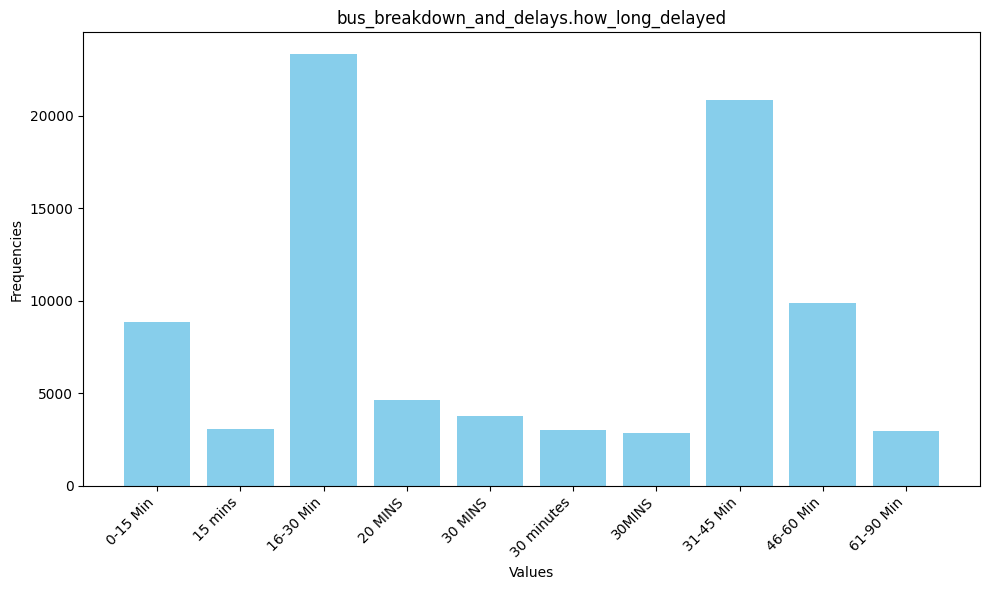

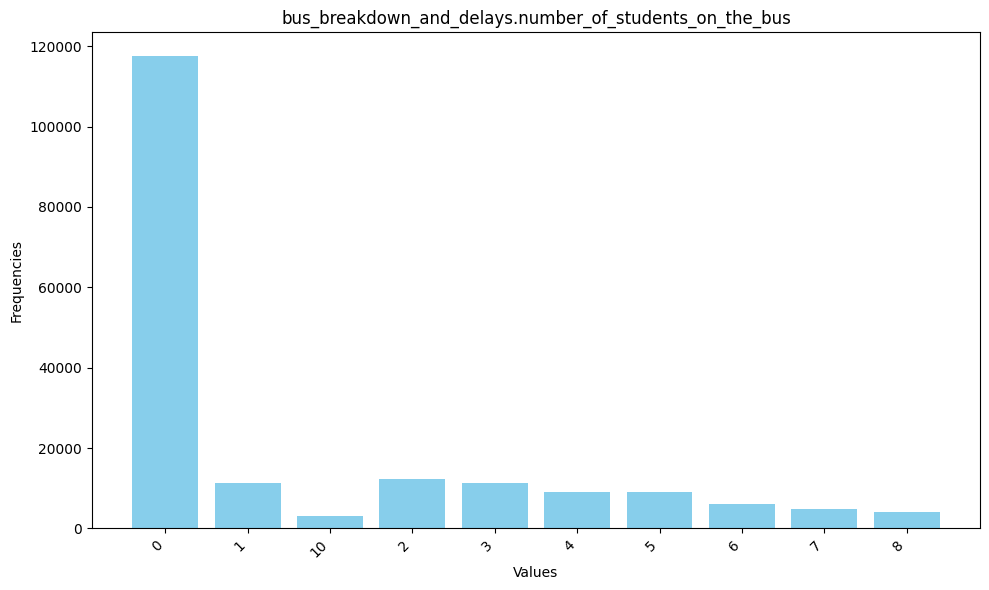

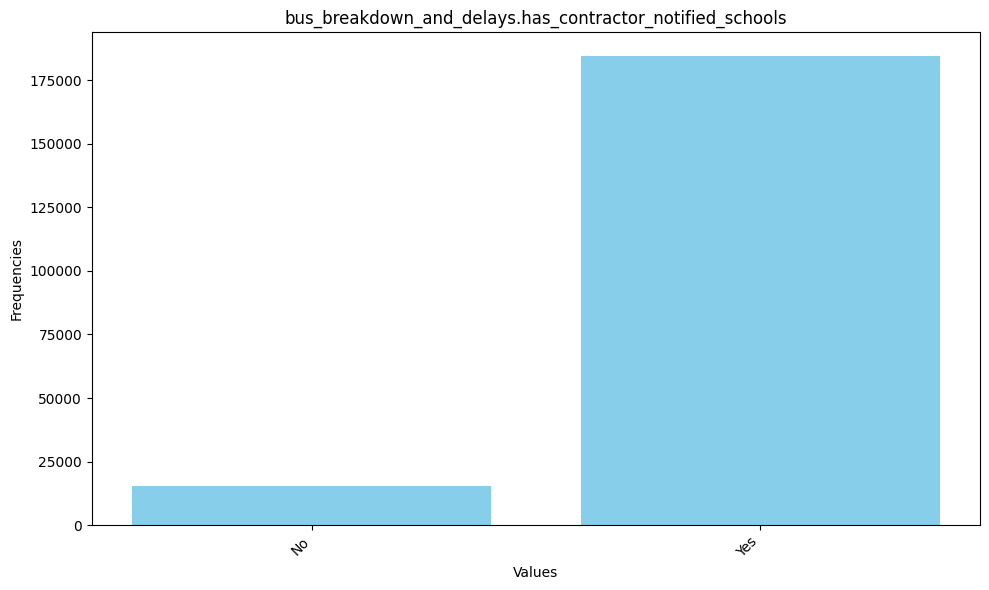

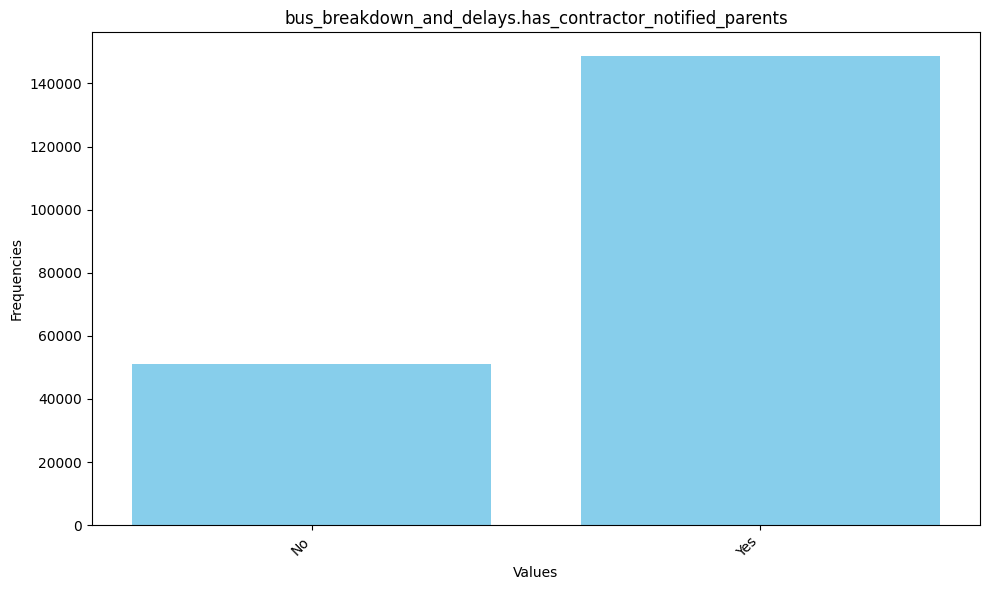

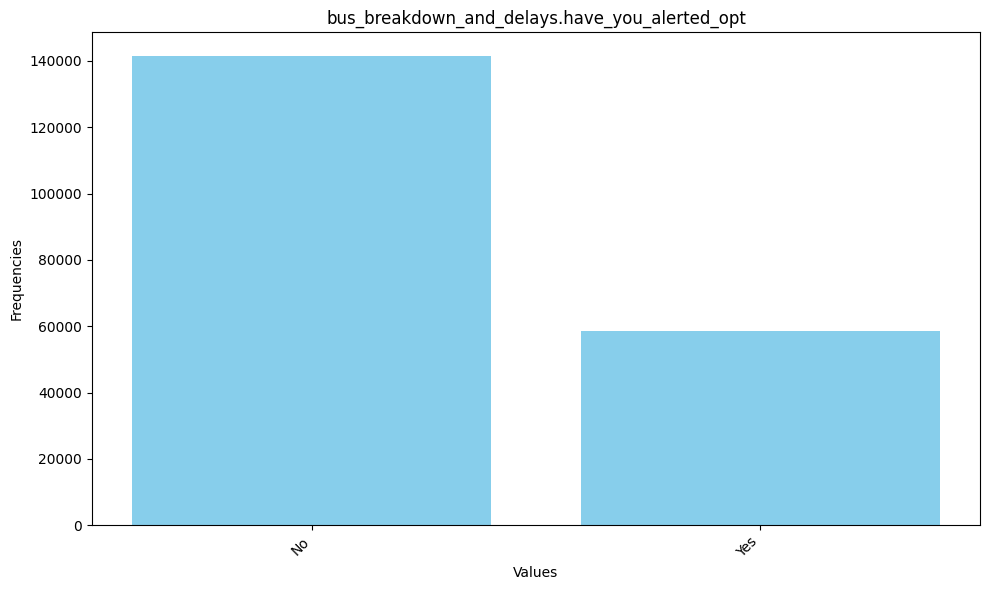

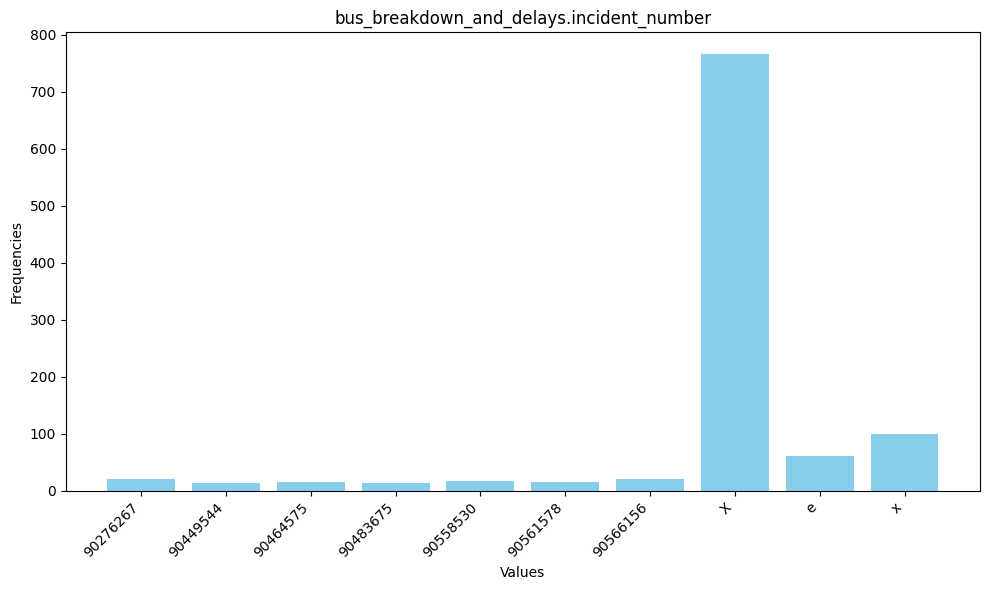

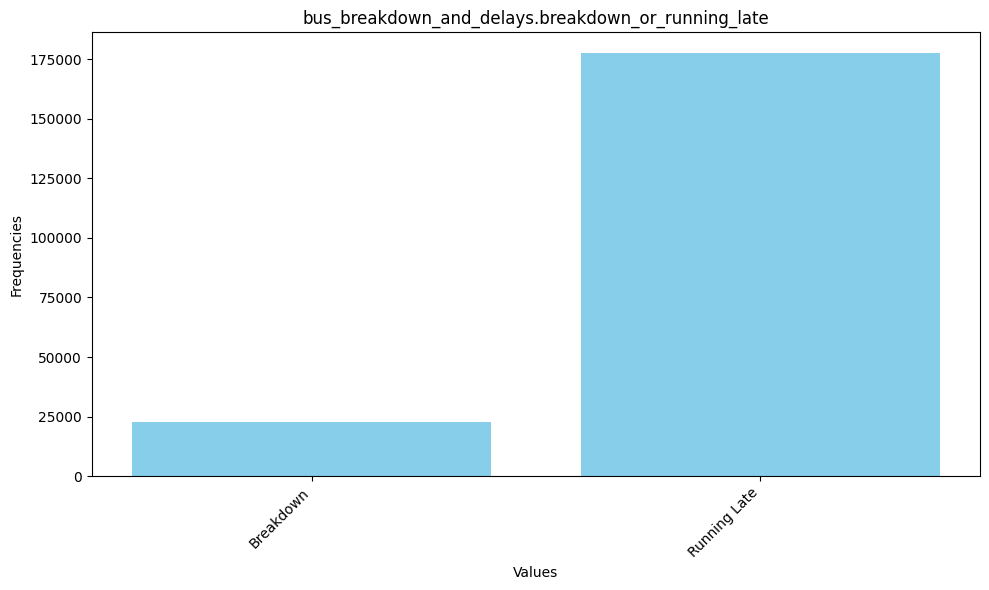

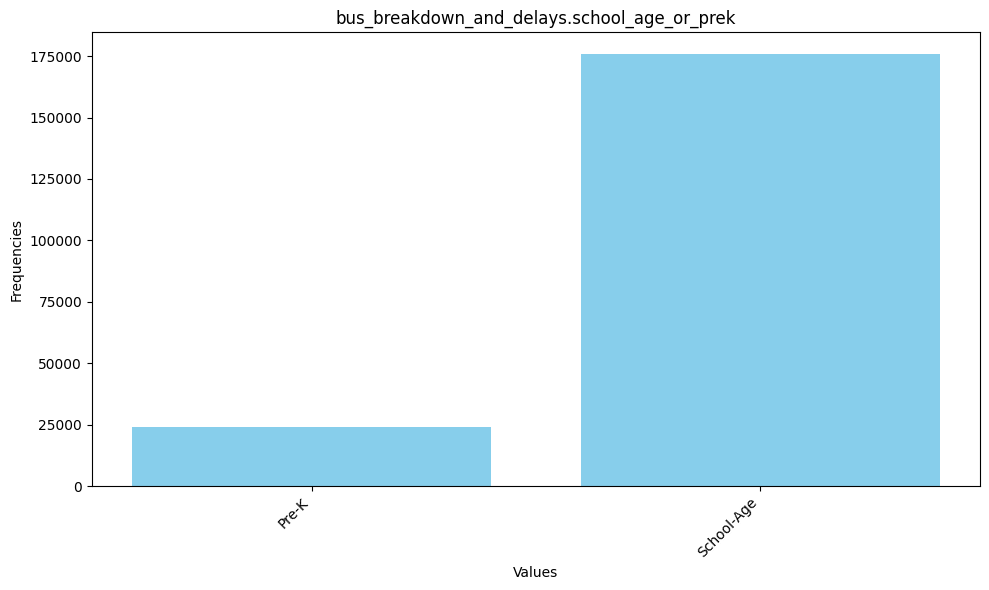

In [26]:

table = "bus_breakdown_and_delays"
import matplotlib.pyplot as plt

table = "bus_breakdown_and_delays"
columns = ["school_year",  "run_type", "bus_no", "route_number", "reason", "schools_serviced", 
           "occured_on",  "boro", "bus_company_name", "how_long_delayed", "number_of_students_on_the_bus", 
           "has_contractor_notified_schools", "has_contractor_notified_parents", "have_you_alerted_opt", 
            "incident_number",  "breakdown_or_running_late", "school_age_or_prek"] #"informed_on","last_updated_on","created_on","busbreakdown_id",

selected_row = profiling_df[profiling_df['table'] == table]

# Check if the row exists
if not selected_row.empty:
    # Extract the dictionary from the selected row
    columnProfiles = selected_row.columnProfiles.iloc[0]
    
    for column in columns:
        selected_column = next((item for item in columnProfiles if item["columnName"] == column), None)
        
        if selected_column:
            frequency_list = selected_column['profile']['frequent_values']
            
            # Sort the frequency_list by the 'value' key
            sorted_frequency_list = sorted(frequency_list, key=lambda x: x['value'])
            
            # Extract 'value' and 'frequency' from each dictionary
            values = [item['value'] for item in sorted_frequency_list]
            frequencies = [item['frequency'] for item in sorted_frequency_list]

            # Create the histogram
            plt.figure(figsize=(10, 6))
            plt.bar(values, frequencies, color='skyblue')
            
            # Add titles and labels
            plt.title(f'{table}.{column}')
            plt.xlabel('Values')
            plt.ylabel('Frequencies')
            
            # Rotate x-axis labels to avoid overlap
            plt.xticks(rotation=45, ha='right')
            
            # Adjust layout to prevent clipping of tick-labels
            plt.tight_layout()
            # Display the histogram
            plt.show()

